In [54]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Exploration des données + DataViz’ : Deadline Vendredi 12 Avril
Votre première tâche consistera à définir le contexte et le périmètre du projet : j’attends que vous preniez vraiment le temps de bien comprendre le projet et de vous renseigner au mieux sur les notions que celui-ci va introduire.
Il faudra ensuite prendre en main et découvrir votre jeu de données et faire une analyse presque exhaustive de celui-ci afin de mettre en lumière la structure, les difficultés et eventuels biais du dataset.
Vous pourrez utiliser ce template : Template - Rapport exploration des données
J’attendrai également au moins 5 représentations graphiques construites à partir de votre jeu de données, visuelles et surtout pertinentes. Pour chacune d’elle j’attendrai :
 
Un commentaire précis, qui analyse la figure et apporte un avis “métier”.
Une validation du constat par des manipulations de données, ou un test statistique.


In [55]:
carac=pd.read_csv("caracteristiques-2022.csv",sep=";",index_col=0)
carac['date'] = carac['an'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['jour'].astype(str)
carac['date'] = pd.to_datetime(carac['an'].astype(str) + '-' + carac['mois'].astype(str) + '-' + carac['jour'].astype(str))
carac['lat']=carac['lat'].replace(",",".")
#carac['lat']=carac['lat'].astype(float)
display(carac.head(5))
display (carac.info())



,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,date
Accident_Id,,,,,,,,,,,,,,,
202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000",2022-10-19
202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000",2022-10-20
202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000",2022-10-20
202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000",2022-10-20
202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775",2022-10-19


<class 'pandas.core.frame.DataFrame'>
Index: 55302 entries, 202200000001 to 202200055302
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   jour    55302 non-null  int64         
 1   mois    55302 non-null  int64         
 2   an      55302 non-null  int64         
 3   hrmn    55302 non-null  object        
 4   lum     55302 non-null  int64         
 5   dep     55302 non-null  object        
 6   com     55302 non-null  object        
 7   agg     55302 non-null  int64         
 8   int     55302 non-null  int64         
 9   atm     55302 non-null  int64         
 10  col     55302 non-null  int64         
 11  adr     54069 non-null  object        
 12  lat     55302 non-null  object        
 13  long    55302 non-null  object        
 14  date    55302 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(6)
memory usage: 6.8+ MB


None

In [56]:

usagers=pd.read_csv("usagers-2022.csv",sep=";")
display(usagers.head(5))
display (usagers.info())
display (usagers.describe())


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126662 entries, 0 to 126661
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      126662 non-null  int64  
 1   id_usager    126662 non-null  object 
 2   id_vehicule  126662 non-null  object 
 3   num_veh      126662 non-null  object 
 4   place        126662 non-null  int64  
 5   catu         126662 non-null  int64  
 6   grav         126662 non-null  int64  
 7   sexe         126662 non-null  int64  
 8   an_nais      123788 non-null  float64
 9   trajet       126662 non-null  int64  
 10  secu1        126662 non-null  int64  
 11  secu2        126662 non-null  int64  
 12  secu3        126662 non-null  int64  
 13  locp         126662 non-null  int64  
 14  actp         126662 non-null  object 
 15  etatp        126662 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.5+ MB


None

,Num_Acc,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
count,1.266620e+05,126662.000000,126662.000000,126662.000000,126662.000000,123788.000000,126662.000000,126662.000000,126662.000000,126662.000000,126662.000000,126662.000000
mean,2.022000e+11,2.089277,1.330067,2.512143,1.265549,1983.432756,3.174749,1.847586,0.844665,-0.916352,-0.158801,-0.829815
std,1.593056e+04,2.583156,0.610060,1.381566,0.570105,18.989238,2.780135,2.283796,2.957905,0.883369,1.204472,0.615546
min,2.022000e+11,-1.000000,1.000000,-1.000000,-1.000000,1913.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.022000e+11,1.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.022000e+11,1.000000,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,2.022000e+11,2.000000,2.000000,4.000000,2.000000,1999.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,2.022001e+11,10.000000,3.000000,4.000000,2.000000,2022.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [57]:
def wrong_type(x):
    try:
        int(x)
    except ValueError:
        return x

print(usagers["an_nais"].apply(wrong_type).loc[usagers["an_nais"].apply(wrong_type).notna()])
#usagers["an_nais"].apply(int(usagers["an_nais"])).astype(int)


Series([], Name: an_nais, dtype: float64)


In [58]:

vehicules=pd.read_csv("vehicules-2022.csv",sep=";")
display(vehicules.head(5))
display (vehicules.info())
display (vehicules.describe())



,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000001,813 952,A01,1,2,0,2,1,9,1,NaN
1,202200000001,813 953,B01,1,7,0,2,2,1,1,NaN
2,202200000002,813 950,B01,2,7,0,2,8,15,1,NaN
3,202200000002,813 951,A01,2,10,0,2,1,1,1,NaN
4,202200000003,813 948,A01,2,7,0,2,1,2,1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94493 entries, 0 to 94492
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_Acc      94493 non-null  int64  
 1   id_vehicule  94493 non-null  object 
 2   num_veh      94493 non-null  object 
 3   senc         94493 non-null  int64  
 4   catv         94493 non-null  int64  
 5   obs          94493 non-null  int64  
 6   obsm         94493 non-null  int64  
 7   choc         94493 non-null  int64  
 8   manv         94493 non-null  int64  
 9   motor        94493 non-null  int64  
 10  occutc       817 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 7.9+ MB


None

,Num_Acc,senc,catv,obs,obsm,choc,manv,motor,occutc
count,9.449300e+04,94493.000000,94493.000000,94493.000000,94493.000000,94493.000000,94493.000000,94493.000000,817.000000
mean,2.022000e+11,1.573439,13.456245,1.027579,1.664515,2.876837,6.924270,1.320352,1.919217
std,1.592168e+04,0.822237,14.322038,3.128954,1.265675,2.419628,7.888078,1.080011,3.432234
min,2.022000e+11,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,2.022000e+11,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.022000e+11,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000
75%,2.022000e+11,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,1.000000
max,2.022001e+11,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,38.000000


In [59]:
lieux=pd.read_csv("lieux-2022.csv",sep=";")
display(lieux.head(5))
display (lieux.info())
display (lieux.describe())


C:\Users\alban\AppData\Local\Temp\ipykernel_32304\2594541269.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux=pd.read_csv("lieux-2022.csv",sep=";")


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000003,3,ROND POINT DE BREZILLET,0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50
3,202200000004,4,QUATORZE JUILLET (RUE DU),0,NaN,1,1,0,2,(1),(1),1,NaN,4,1,0,1,30
4,202200000005,3,ROUTE DE JEAN MOULIN-RN 538,0,NaN,2,2,0,1,8,0,1,NaN,-1,1,0,1,80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  55302 non-null  int64 
 1   catr     55302 non-null  int64 
 2   voie     50497 non-null  object
 3   v1       55302 non-null  int64 
 4   v2       5255 non-null   object
 5   circ     55302 non-null  int64 
 6   nbv      55302 non-null  object
 7   vosp     55302 non-null  int64 
 8   prof     55302 non-null  int64 
 9   pr       55302 non-null  object
 10  pr1      55302 non-null  object
 11  plan     55302 non-null  int64 
 12  lartpc   28 non-null     object
 13  larrout  55302 non-null  object
 14  surf     55302 non-null  int64 
 15  infra    55302 non-null  int64 
 16  situ     55302 non-null  int64 
 17  vma      55302 non-null  int64 
dtypes: int64(11), object(7)
memory usage: 7.6+ MB


None

,Num_Acc,catr,v1,circ,vosp,prof,plan,surf,infra,situ,vma
count,5.530200e+04,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000
mean,2.022000e+11,3.364309,-0.175111,1.807511,0.230552,1.234838,1.312538,1.246266,0.779610,1.636812,58.294239
std,1.596446e+04,1.246244,0.397916,0.901046,0.691514,0.544126,0.687786,0.858237,2.157695,1.592397,25.106518
min,2.022000e+11,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.022000e+11,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000
50%,2.022000e+11,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000
75%,2.022000e+11,4.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000
max,2.022001e+11,9.000000,3.000000,4.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,700.000000


In [60]:

immat=pd.read_csv("2021.csv",sep=";",index_col=0)
display(immat.head(5))
display (immat.info())
display (immat.describe())



,Lettre Conventionnelle Véhicule,Année,Lieu Admin Actuel - Territoire Nom,Type Accident - Libellé (old),CNIT,Catégorie véhicule,Age véhicule
Id_accident,,,,,,,
58 720,A,2021,Métropole,Accident grave non mortel,MJT5562EV674,VT,13.0
58 720,B,2021,Métropole,Accident grave non mortel,MJT1272R5676,VT,12.0
58 721,A,2021,Métropole,Accident grave non mortel,NaN,VT,16.0
58 722,A,2021,Métropole,Accident Léger,M10FATVP001U442,VT,9.0
58 722,B,2021,Métropole,Accident Léger,M10DACVP001T424,VT,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 89416 entries, 58 720 to 117 443
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lettre Conventionnelle Véhicule     89416 non-null  object 
 1   Année                               89416 non-null  int64  
 2   Lieu Admin Actuel - Territoire Nom  89416 non-null  object 
 3   Type Accident - Libellé (old)       89416 non-null  object 
 4   CNIT                                69987 non-null  object 
 5   Catégorie véhicule                  89416 non-null  object 
 6   Age véhicule                        84507 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ MB


None

,Année,Age véhicule
count,89416.0,84507.000000
mean,2021.0,8.827565
std,0.0,6.909339
min,2021.0,0.000000
25%,2021.0,3.000000
50%,2021.0,8.000000
75%,2021.0,13.000000
max,2021.0,85.000000


In [61]:
def show_missing(df):    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    distribution=[]
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))
        if len(df[item].unique())<15:
            distribution.append(list(df[item].unique()))
        elif df[item].dtype in ['int','float']:
            distribution.append("AVG = "+ str(df[item].mean()) + " / STD = " + str(df[item].std()) + " / Qx = " +  str(df[item].quantile([0.25, 0.5, 0.75])))
        else:
            distribution.append("")

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing,
        "distribution": distribution
    })    
        
    return output

for i in (carac,usagers,lieux,vehicules,immat):
    display(show_missing(i))



,variable,dtype,count,unique,missing,pc_missing,distribution
0,jour,int64,55302,31,0,0.00,
1,mois,int64,55302,12,0,0.00,"[10, 9, 7, 8, 6, 5, 4, 3, 2, 12, 11, 1]"
2,an,int64,55302,1,0,0.00,[2022]
3,hrmn,object,55302,1398,0,0.00,
4,lum,int64,55302,6,0,0.00,"[1, 5, 3, 2, 4, -1]"
5,dep,object,55302,107,0,0.00,
6,com,object,55302,11253,0,0.00,
7,agg,int64,55302,2,0,0.00,"[2, 1]"
8,int,int64,55302,10,0,0.00,"[3, 6, 1, 2, 9, 7, 4, 8, 5, -1]"
9,atm,int64,55302,10,0,0.00,"[1, 8, 2, 9, 3, 5, 7, 6, 4, -1]"


,variable,dtype,count,unique,missing,pc_missing,distribution
0,Num_Acc,int64,126662,55302,0,0.00,
1,id_usager,object,126662,126662,0,0.00,
2,id_vehicule,object,126662,94493,0,0.00,
3,num_veh,object,126662,47,0,0.00,
4,place,int64,126662,11,0,0.00,"[1, 10, 2, 4, 3, 9, 7, 8, 5, 6, -1]"
5,catu,int64,126662,3,0,0.00,"[1, 3, 2]"
6,grav,int64,126662,5,0,0.00,"[3, 1, 4, 2, -1]"
7,sexe,int64,126662,3,0,0.00,"[1, 2, -1]"
8,an_nais,float64,126662,105,2874,2.27,AVG = 1983.4327560021973 / STD = 18.9892382893...
9,trajet,int64,126662,8,0,0.00,"[5, 9, 4, 0, 3, -1, 2, 1]"


,variable,dtype,count,unique,missing,pc_missing,distribution
0,Num_Acc,int64,55302,55302,0,0.00,
1,catr,int64,55302,8,0,0.00,"[4, 3, 1, 2, 5, 7, 9, 6]"
2,voie,object,55302,16311,4805,8.69,
3,v1,int64,55302,4,0,0.00,"[0, -1, 2, 3]"
4,v2,object,55302,26,50047,90.50,
5,circ,int64,55302,5,0,0.00,"[2, -1, 1, 3, 4]"
6,nbv,object,55302,29,0,0.00,
7,vosp,int64,55302,5,0,0.00,"[0, 3, 2, 1, -1]"
8,prof,int64,55302,5,0,0.00,"[1, 2, 4, 3, -1]"
9,pr,object,55302,463,0,0.00,


,variable,dtype,count,unique,missing,pc_missing,distribution
0,Num_Acc,int64,94493,55302,0,0.00,
1,id_vehicule,object,94493,94493,0,0.00,
2,num_veh,object,94493,47,0,0.00,
3,senc,int64,94493,5,0,0.00,"[1, 2, 0, 3, -1]"
4,catv,int64,94493,32,0,0.00,
5,obs,int64,94493,19,0,0.00,
6,obsm,int64,94493,8,0,0.00,"[2, 1, 0, -1, 9, 4, 5, 6]"
7,choc,int64,94493,11,0,0.00,"[1, 2, 8, 4, 3, 6, 7, 0, 5, 9, -1]"
8,manv,int64,94493,28,0,0.00,
9,motor,int64,94493,8,0,0.00,"[1, 2, 5, 3, 6, 0, -1, 4]"


,variable,dtype,count,unique,missing,pc_missing,distribution
0,Lettre Conventionnelle Véhicule,object,89416,44,0,0.00,
1,Année,int64,89416,1,0,0.00,[2021]
2,Lieu Admin Actuel - Territoire Nom,object,89416,3,0,0.00,"[Métropole, Autres OM, DOM]"
3,Type Accident - Libellé (old),object,89416,3,0,0.00,"[Accident grave non mortel, Accident Léger, Ac..."
4,CNIT,object,89416,27162,19429,21.73,
5,Catégorie véhicule,object,89416,9,0,0.00,"[VT, VU, Moto lourde, Indéterminable, Autres, ..."
6,Age véhicule,float64,89416,75,4909,5.49,AVG = 8.827564580448957 / STD = 6.909339222257...


([<matplotlib.axis.XTick at 0x1f8c64d28a0>,
 [Text(0, 0, '-1 : na'),
  Text(1, 0, '1 – Indemne'),
  Text(2, 0, '2 – Tué'),
  Text(3, 0, '3 – Blessé hospitalisé'),
  Text(4, 0, '4 – Blessé léger')])

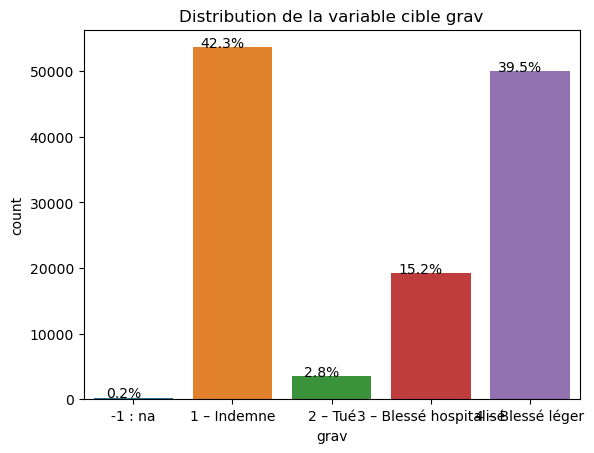

In [62]:
ax1 = sns.countplot(x = "grav", data = usagers)

total = len(usagers["grav"])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.1
    ax1.text(x, y, percentage, ha = 'center')

plt.title("Distribution de la variable cible grav", fontsize = 12)
plt.xticks(ticks = range(5), labels = ["-1 : na", "1 – Indemne", "2 – Tué","3 – Blessé hospitalisé","4 – Blessé léger"])


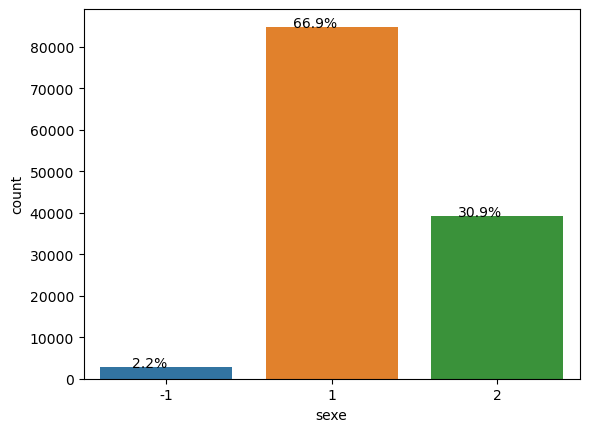

In [63]:
ax1 = sns.countplot(x = "sexe", data = usagers)

total = len(usagers["grav"])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.1
    ax1.text(x, y, percentage, ha = 'center')

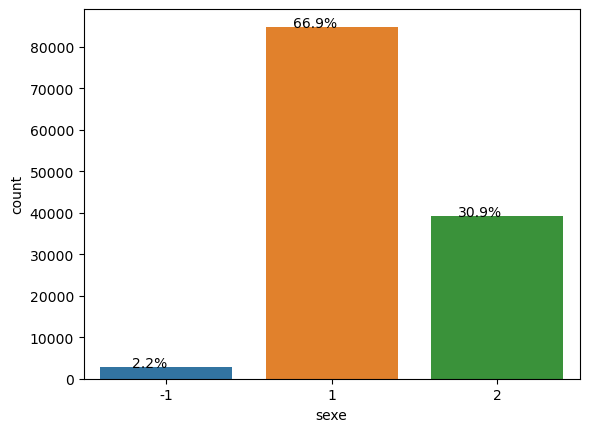

In [64]:
ax1 = sns.countplot(x = "sexe", data = usagers)

total = len(usagers["grav"])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.1
    ax1.text(x, y, percentage, ha = 'center')

c:\Users\alban\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 500x400 with 0 Axes>

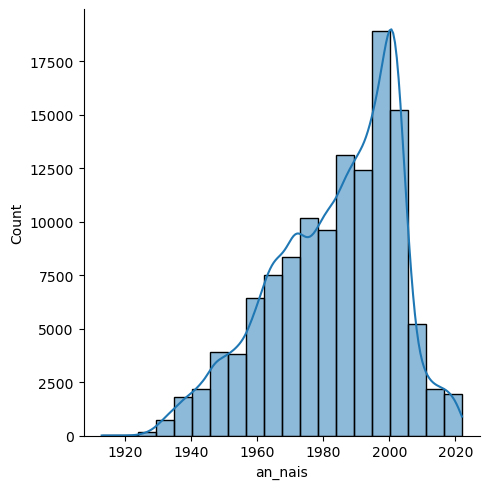

In [65]:
plt.figure(figsize=(5,4))
ax1 = sns.displot(usagers["an_nais"], kde=True, bins=20)


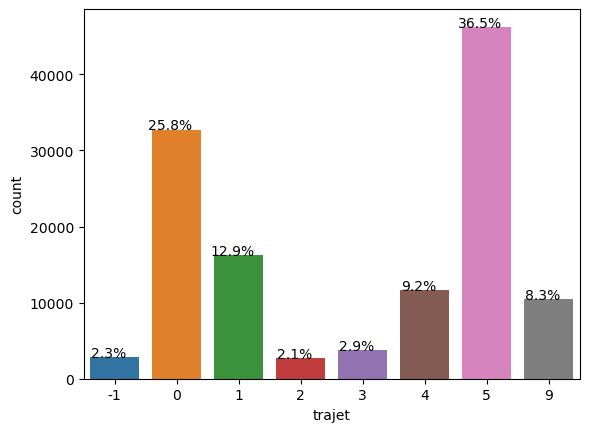

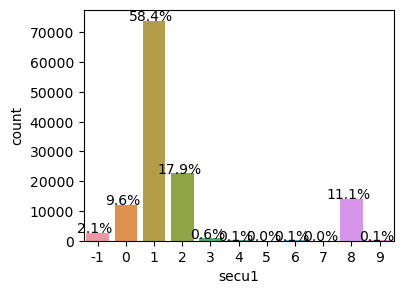

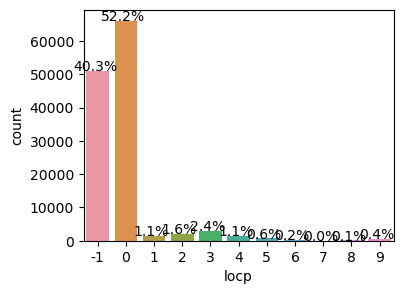

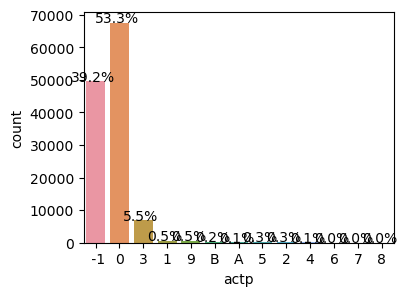

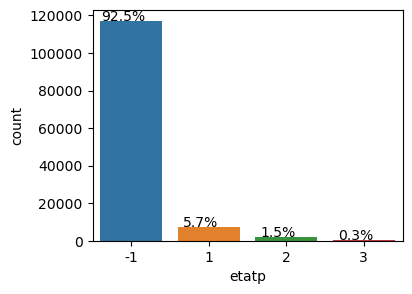

<Figure size 400x300 with 0 Axes>

In [66]:
for i in ("trajet","secu1","locp","actp","etatp"):
    ax1 = sns.countplot(x = i, data = usagers)
    plt.figure(figsize=(4,3))
    total = len(usagers[i])
    for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height() + 0.1
        ax1.text(x, y, percentage, ha = 'center')

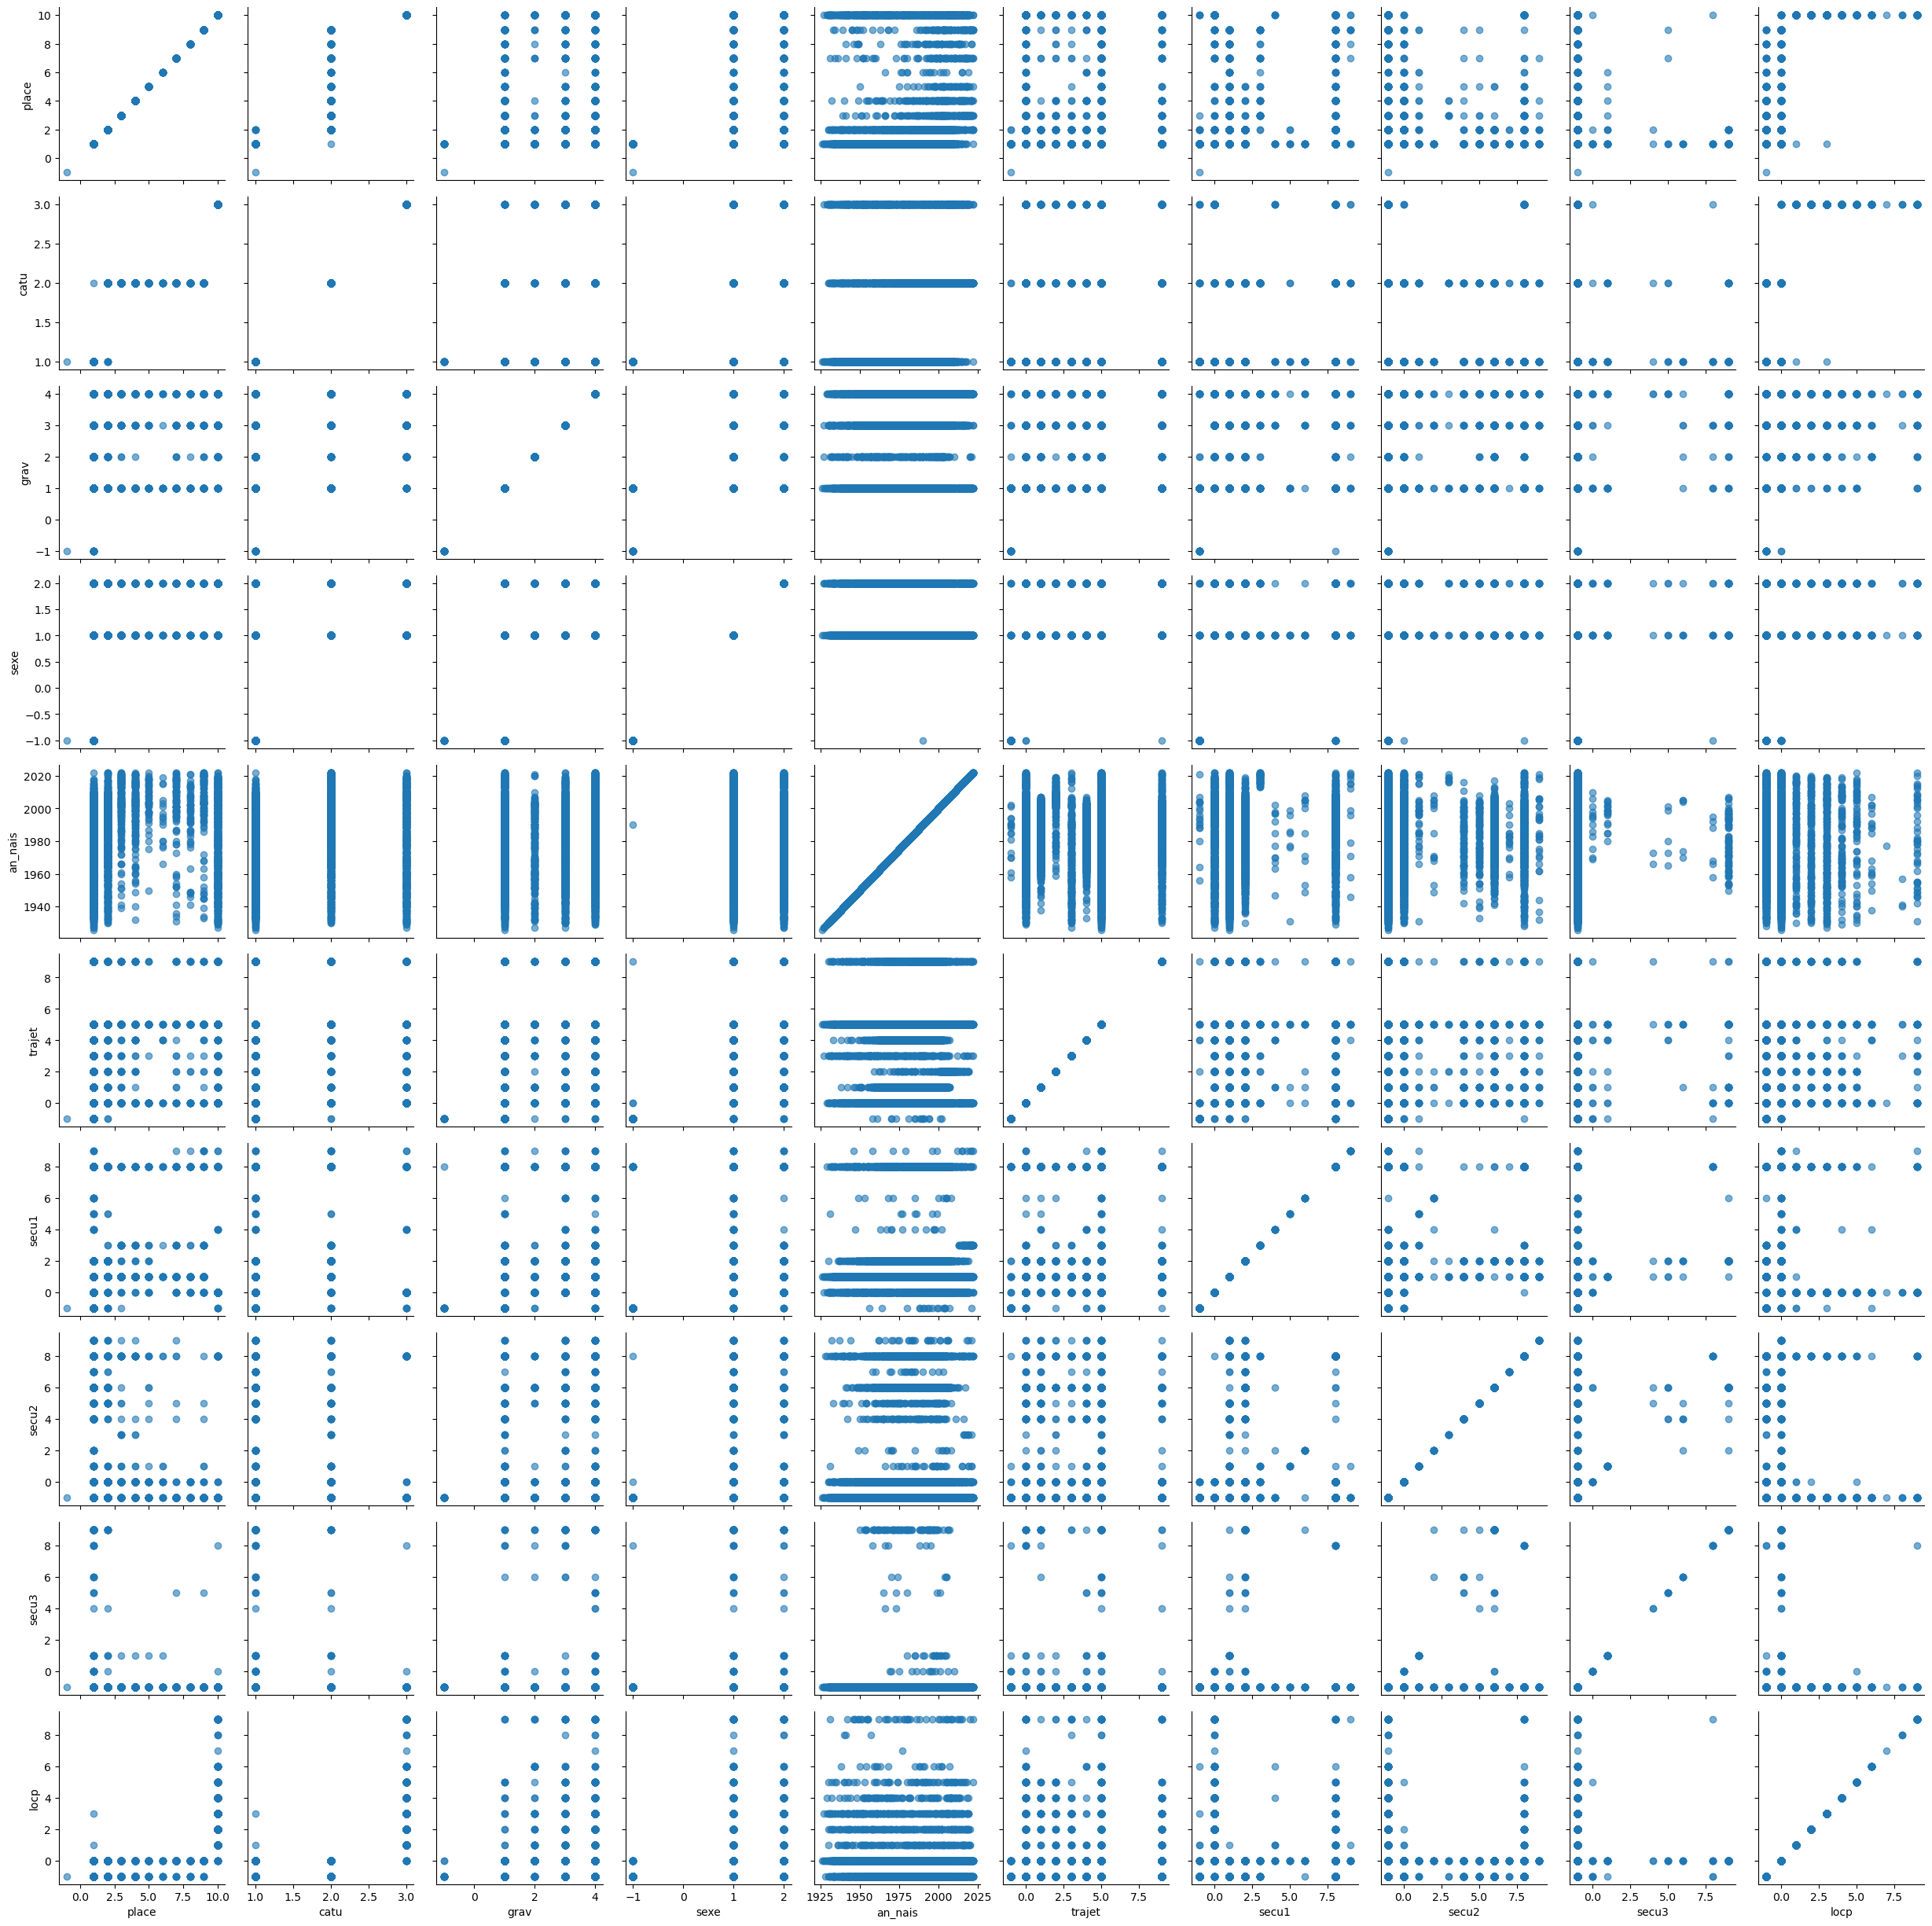

In [72]:
g=sns.PairGrid(usagers.iloc[:10000,4:-1])
g.map(plt.scatter,alpha=0.6)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 55302 entries, 202200000001 to 202200055302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   com     55302 non-null  object
 1   lat     55302 non-null  object
 2   long    55302 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
import geopandas as gpd
from geodatasets import get_path

df=carac[['com','lat','long']]
df.info()
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat), crs="EPSG:4326")
gdf.head(5)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_title("Nombre de clients par pays");